# Relationships between stats in Pokemon

Pandas Data Science Project 1

Jenna deBoisblanc

October 18, 2019

Advanced Topics in Computer Science and Making

Isidore Newman School

# Abstract

I used a dataset of all the pokemon from the first six generations of pokemon including the stats for each pokemon

I created a function to determine the two stats with the strongest relationship based on r value and slope, and I found out that they were Special Defense and Attack.  

This means that for pokemon with similar overall strength, ones with higher attack will typically have lower Special Defense and vise versa.

# Introduction

My research question was "Which two stats have the strongest and most significant linear relationship?"  I wanted to know because the answer to this question can explain how Nintendo balances pokemon in order make sure the game doesn't become to hard or easy.

I got my dataset from https://www.kaggle.com/abcsds/pokemon. It is usefull because it gives all the stats for each pokemon allowing me to run an analysis on every possible relationship. 

------------------------------------------------------------------------------------------------------
  /#        Name Type_1  Type_2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1   Bulbasaur  Grass  Poison    318  45      49       49       65       65   
   

   Speed  Generation  Legendary  
0     45           1      False  

------------------------------------------------------------------------------------------------------
The name, and types of a pokemon are strings, whether or not it is a legendary pokemon is save as a boolean, and all the stats in addition to its iD number and Generation number are intergers.

If you want to know more about what each stat does visit this website: https://bulbapedia.bulbagarden.net/wiki/Statistic

# Methods and Process

I first made a function def compare_stats which takes any two stats columns and plot them against each other for each pokemon.
Then I added a Least Squared Regression Line and line of code which tells me important statistical information such as the r 
value, and slope of the LSQR line.  Finally I used a for loop to call that function for every possible combination of stats and
determine the one with the 'best' relationship.  When comparing the two I multiplied each stat by (its total/average total) 
because before I did that most relationship came out positive because as a pokemon gets stronger, all of its stats will see a 
general increase.  

I returned the two varibles with the highest value of the coefficient of correlation divided by how difference between the slope and 1.

I made a scatter plot with the LSQR line included to visualize the data using the two returned variables.

# Results

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import linregress

df = pd.read_csv('Pokemon_nomega.csv')
avg = df.Total.mean()

%matplotlib notebook
%matplotlib inline

# Compare Stats

In [7]:
def compare_stats(Stat_1, Stat_2, show):
    df_Adj = df.copy()
    # decide whether on not to multiply by avgtotal/total
    if (Stat_1 == '#' or Stat_2 == '#'):
        df_Adj[Stat_1] = df[Stat_1]
        df_Adj[Stat_2] = df[Stat_2]
        if (Stat_1 == 'Name'):
            for i in range(len(df.Name)):
                df_Adj.loc[i, 'Name'] = len(df['Name'][i])
        elif (Stat_2 == 'Name'):
            for i in range(len(df.Name)):
                df_Adj.loc[i, 'Name'] = len(df['Name'][i])
    else:
        if (Stat_1 == 'Name'):
            for i in range(len(df.Name)):
                df_Adj.loc[i, 'Name'] = len(df['Name'][i])
            df_Adj[Stat_2] = df[Stat_2]/df['Total']*avg
        elif (Stat_2 == 'Name'):
            df_Adj[Stat_1] = df[Stat_1]/df['Total']*avg
            for i in range(len(df.Name)):
                df_Adj.loc[i, 'Name'] = len(df['Name'][i])
        else:
            df_Adj[Stat_1] = df[Stat_1]/df['Total']*avg
            df_Adj[Stat_2] = df[Stat_2]/df['Total']*avg
    

    # plot the original scatterplot and the LSRL
    if show:
        # get a vector of coefficents which minimize the error squared (function for the LSRL)
        fit = np.polyfit(df_Adj[Stat_1],df_Adj[Stat_2], 1)

        #  fit[0] represents the slope and fit[1] represents the y intercept 
        print('Equation: y = '+str(round(fit[0], 2))+'x + '+str(round(fit[1], 2)))

        # calculate the y values based on the coefficients from the model
        r_x, r_y = zip(*((i, i*fit[0] + fit[1]) for i in df_Adj[Stat_1]))
    
        # put LSRL points into a data frame
        lm_original_plot = pd.DataFrame({
        Stat_1 : r_x,
        Stat_2 : r_y
    })
        
        # setup axes so that the LSRL and the scatterplot show up on the same graph
        fig, axes = plt.subplots()
        
        df_Adj.plot(x=Stat_1, y=Stat_2, kind = 'scatter', ax = axes, title=Stat_1 + ' vs. ' + Stat_2)
        lm_original_plot.plot(x=Stat_1, y=Stat_2, kind = 'line', ax=axes, color = 'red')
        linregress(df_Adj[Stat_1], df_Adj[Stat_2])
        plt.show()
    return (linregress(df_Adj[Stat_1], df_Adj[Stat_2]))

# Compare All

Sp. Def : Attack
Equation: y = -0.65x + 120.49


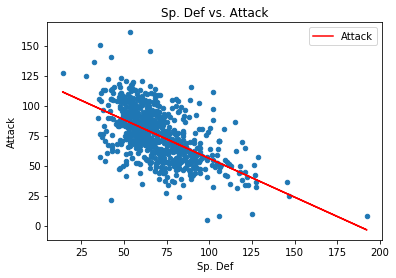

LinregressResult(slope=-0.6450831645147493, intercept=120.48670072818834, rvalue=-0.5719879990539349, pvalue=2.6862414127743344e-66, stderr=0.033847069735152883)

In [8]:
# Compare stats(xAxis, yAxis, Is one of the columns "Total", "#", or "Generation"?)
cols = df.columns
cols = cols.drop(['Type_1', 'Type_2', 'Legendary', 'Generation', '#'])

best_Relationship = ['', '', 0, 0]
for Stat_1 in cols:
    for Stat_2 in cols:
        if (Stat_1 != Stat_2):
            temp = compare_stats(Stat_1, Stat_2, False) 
            if (abs((temp.rvalue*2)/(1-abs(temp.slope))) >= abs((best_Relationship[2]*2)/(abs(1-abs(best_Relationship[3]))))):
                best_Relationship[0] = Stat_1
                best_Relationship[1] = Stat_2
                best_Relationship[2] = temp.rvalue
                best_Relationship[3] = temp.slope

print(best_Relationship[0] + " : " + best_Relationship[1])
compare_stats(best_Relationship[0], best_Relationship[1], True)

Equation: y = 0.21x + 60.82


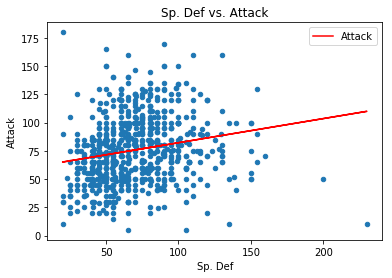

LinregressResult(slope=0.2137890874853579, intercept=60.8237146127237, rvalue=0.19696207768121501, pvalue=5.487252649589698e-08, stderr=0.038935955674491374)

In [9]:
def compare_stats2(Stat_1, Stat_2, show):
    df_Adj = df.copy()
    if (Stat_1 == '#' or Stat_2 == '#'):
        df_Adj[Stat_1] = df[Stat_1]
        df_Adj[Stat_2] = df[Stat_2]
        if (Stat_1 == 'Name'):
            for i in range(len(df.Name)):
                df_Adj.loc[i, 'Name'] = len(df['Name'][i])
        elif (Stat_2 == 'Name'):
            for i in range(len(df.Name)):
                df_Adj.loc[i, 'Name'] = len(df['Name'][i])
    else:
        if (Stat_1 == 'Name'):
            for i in range(len(df.Name)):
                df_Adj.loc[i, 'Name'] = len(df['Name'][i])
            df_Adj[Stat_2] = df[Stat_2]
        elif (Stat_2 == 'Name'):
            df_Adj[Stat_1] = df[Stat_1]
            for i in range(len(df.Name)):
                df_Adj.loc[i, 'Name'] = len(df['Name'][i])
        else:
            df_Adj[Stat_1] = df[Stat_1]
            df_Adj[Stat_2] = df[Stat_2]
    

    # plot the original scatterplot and the LSRL
    if show:
        # get a vector of coefficents which minimize the error squared (function for the LSRL)
        fit = np.polyfit(df_Adj[Stat_1],df_Adj[Stat_2], 1)

        #  fit[0] represents the slope and fit[1] represents the y intercept 
        print('Equation: y = '+str(round(fit[0], 2))+'x + '+str(round(fit[1], 2)))

        # calculate the y values based on the coefficients from the model
        r_x, r_y = zip(*((i, i*fit[0] + fit[1]) for i in df_Adj[Stat_1]))
    
        # put LSRL points into a data frame
        lm_original_plot = pd.DataFrame({
        Stat_1 : r_x,
        Stat_2 : r_y
    })
        
        # setup axes so that the LSRL and the scatterplot show up on the same graph
        fig, axes = plt.subplots()
        
        df_Adj.plot(x=Stat_1, y=Stat_2, kind = 'scatter', ax = axes, title=Stat_1 + ' vs. ' + Stat_2)
        lm_original_plot.plot(x=Stat_1, y=Stat_2, kind = 'line', ax=axes, color = 'red')
        linregress(df_Adj[Stat_1], df_Adj[Stat_2])
        plt.show()
    return (linregress(df_Adj[Stat_1], df_Adj[Stat_2]))
compare_stats2(best_Relationship[0], best_Relationship[1], True)

# Discussion

According to my program, the strongest relationship is betweeen Special Defense and Attack.  This means that for every pokemon with similar total stats, ones with higher attack have a greater probability of having a lower Special Defense. 

Nintendo most likely did this intentionally because if a pokemon doesn't have any weaknesses in either damage output or survivability, they would be overpowered leading to the game not being as fun. 

Knowing what I know now, I wouldn't have bothered with finding the relationship between name length and other stats.  It was fun, but it also took up alot of time and did not yield a very significant result. 

An ideal dataset would have included the most recent generation of pokemon (there are 7 and this datseeet only has the first 6).
I am unsure of what difference this would make, but it would be interesting to see if there is one.